# 🦥 **FineTuning With Unsloth**

### In this tutorial we'll finetune the `Llama-3.2-3B-Instruct` model using unsloth on the [ServiceNow-AI/R1-Distill-SFT](https://huggingface.co/datasets/ServiceNow-AI/R1-Distill-SFT) dataset to empower the llama model with DeepSeek-R1 like 'thinking' capabilities.

Let's start with installing the dependencies.

In [ ]:
!pip install -q unsloth
# Also get the latest nightly Unsloth!
!pip install -q --force-reinstall --no-cache-dir --no-deps git+https://github.com/unslothai/unsloth.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-req-build-lkox0y1u
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-req-build-lkox0y1u
  Resolved https://github.com/unslothai/unsloth.git to commit bdf0cd6033595be4e7ed23d0d002bb176d343152
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for unsloth: filename=unsloth-2025.1.7-py3-none-any.whl size=174896 sha256=102bba5858a4720a309120a91b783bd9ac83b252e7cf5e6aaf5285d3741cbc10
  Stored in directory: /tmp/pip-ephem-wheel-cache-dvev5sky/wheels/d1/17/05/850ab10c33284a4763b0595cd8ea9d01fce6e221cac24b3c01
Successfully built unsloth
  Attempting uninstall: unsloth
    Found existing installation: unsloth 2025.1.6
    Uninstalling unsloth-2025.1.6:
      Successfully uninstalled unsloth-2025.1.6


Load a quantized Llama 3.2 model using Unsloth's FastLanguageModel for efficient inference/training.

In [ ]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! Unsloth also supports RoPE (Rotary Positinal Embedding) scaling internally.
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.2-3B-Instruct", # or choose "unsloth/Llama-3.2-1B-Instruct"
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit, # Will load the 4Bit Quantized Model
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.1.7: Fast Llama patching. Transformers: 4.47.1.
   \\   /|    GPU: Tesla T4. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.7k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

- `model_name`:Specifies the name of the pre-trained model to load.
- `max_seq_length`:Defines the maximum sequence length (in tokens) that the model can process. max_seq_length = 2048 allows the model to process sequences up to 2048 tokens long.
- `dtype`:Specifies the data type for model weights and computations.
   None: Automatically selects the appropriate data type based on the hardware.
   torch.float16: Uses 16-bit floating point precision, reducing memory usage and potentially increasing speed on compatible GPUs.
   torch.bfloat16: Similar to float16 but with a wider dynamic range, beneficial for certain hardware like NVIDIA A100 GPUs.
- `load_in_4bit`:Determines whether to load the model using 4-bit quantization.Ideal for scenarios where memory efficiency is crucial, such as deploying models on edge devices or during experimentation.

Now, we'll use the `get_peft_model` from unsloth's `FastLanguageModel` class to attach adapters (peft layers) on top of the models in order to perform QLoRA

In [ ]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 16, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16, # a higher alpha value assigns more weight to the LoRA activations
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,
    loftq_config = None,
)

Unsloth 2025.1.7 patched 28 layers with 28 QKV layers, 28 O layers and 28 MLP layers.


<img src="w_formula.jpg"></img>

- `r`: The rank of the low-rank matrices in LoRA; higher values can capture more information but increase memory usage.
- `target_modules`: List of model components (e.g., "q_proj", "k_proj") where LoRA adapters are inserted for fine-tuning.
- `lora_alpha`: Scaling factor for the LoRA updates; controls the impact of the adapters on the model's outputs.
- `lora_dropout`: Dropout rate applied to LoRA layers during training to prevent overfitting.
- `bias`: Specifies how biases are handled in LoRA layers; options include "none", "all", or "lora_only".
- `use_gradient_checkpointing`: Enables gradient checkpointing to reduce memory usage during training; "unsloth" uses Unsloth's optimized version.
- `random_state`: Seed for random number generators to ensure reproducibility of training results.
- `use_rslora`: Boolean indicating whether to use Rank-Stabilized LoRA (rsLoRA) for potentially more stable training.
- `
loftq_config: Configuration for Low-Rank Quantization (LoftQ); set to None to disable this feature.

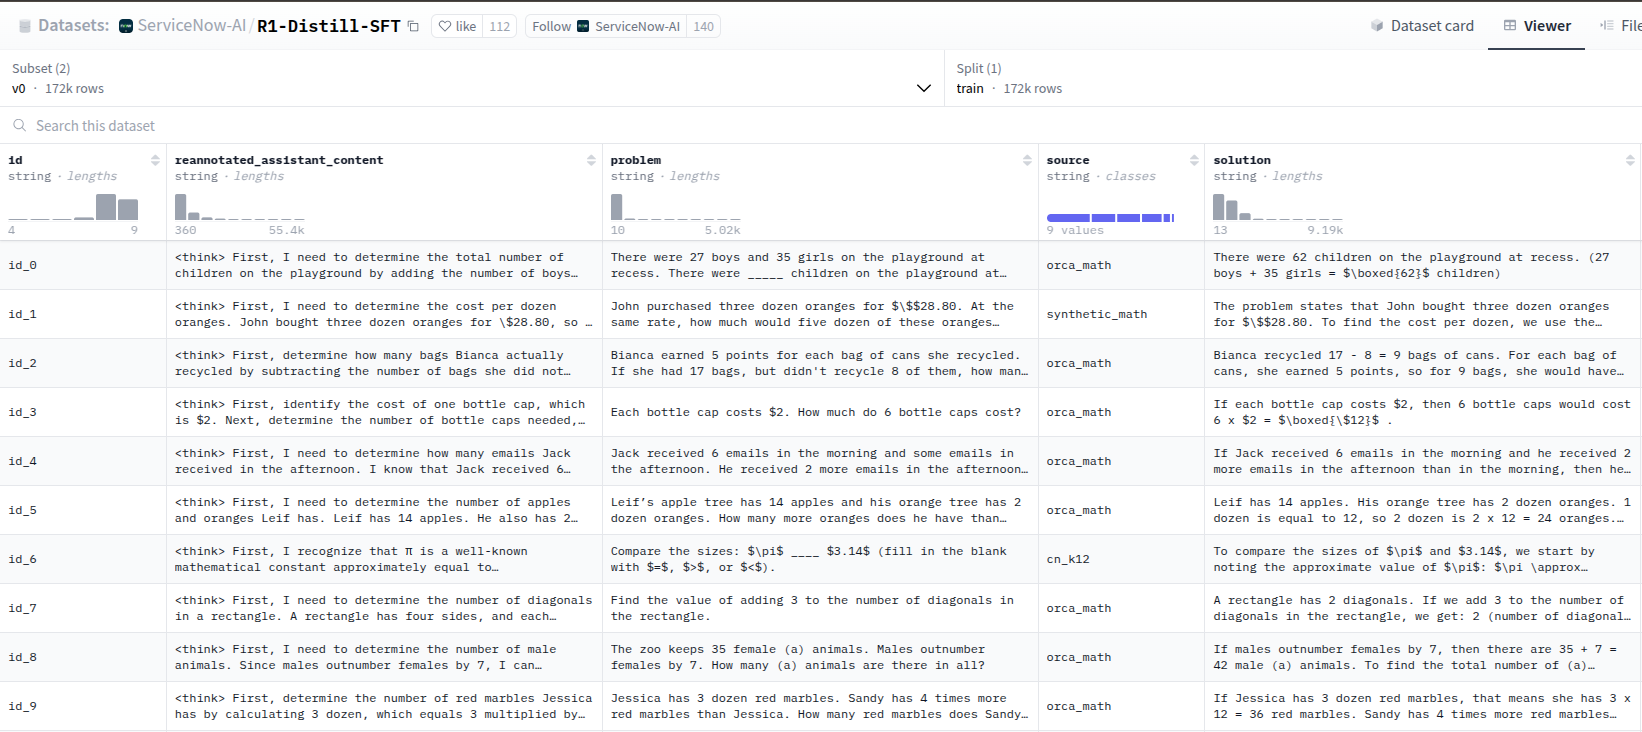

In [ ]:
from datasets import load_dataset
dataset = load_dataset("ServiceNow-AI/R1-Distill-SFT",'v0', split = "train")

README.md:   0%|          | 0.00/2.28k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/180M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/187M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/188M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/171647 [00:00<?, ? examples/s]

In [ ]:
print(dataset[:5])

{'id': ['id_0', 'id_1', 'id_2', 'id_3', 'id_4'], 'reannotated_assistant_content': ['<think>\nFirst, I need to determine the total number of children on the playground by adding the number of boys and girls.\n\nThere are 27 boys and 35 girls.\n\nAdding these together: 27 boys + 35 girls = 62 children.\n\nTherefore, the total number of children on the playground is 62.\n</think>\n\nTo find the total number of children on the playground, we simply add the number of boys and girls together.\n\n\\[\n\\text{Total children} = \\text{Number of boys} + \\text{Number of girls}\n\\]\n\nPlugging in the given values:\n\n\\[\n\\text{Total children} = 27 \\text{ boys} + 35 \\text{ girls} = 62 \\text{ children}\n\\]\n\n**Final Answer:**\n\n\\[\n\\boxed{62}\n\\]', '<think>\nFirst, I need to determine the cost per dozen oranges. John bought three dozen oranges for \\$28.80, so I can find the cost per dozen by dividing the total cost by the number of dozens.\n\nNext, with the cost per dozen known, I can 

Now, we create a prompt template that will be used to finetune our Llama model

In [ ]:
r1_prompt = """You are a reflective assistant engaging in thorough, iterative reasoning, mimicking human stream-of-consciousness thinking. Your approach emphasizes exploration, self-doubt, and continuous refinement before coming up with an answer.
<problem>
{}
</problem>

{}
{}
"""
EOS_TOKEN = tokenizer.eos_token

def formatting_prompts_func(examples):
  problems = examples["problem"]
  thoughts = examples["reannotated_assistant_content"]
  solutions = examples["solution"]
  texts = []

  for problem, thought, solution in zip(problems, thoughts, solutions):
    text = r1_prompt.format(problem, thought, solution)+EOS_TOKEN
    texts.append(text)

  return {"text": texts}

dataset = dataset.map(formatting_prompts_func, batched = True,)

Map:   0%|          | 0/171647 [00:00<?, ? examples/s]

**Trainer Setup:**
- `model` and `tokenizer`: These are the model and tokenizer objects that will be trained.

- `train_dataset`: The dataset used for training.

- `dataset_text_field`: Specifies the field in the dataset that contains the text data.

- `max_seq_length`: Maximum sequence length for the input data.

- `dataset_num_proc`: Number of processes to use for data loading.

- `packing`: If True, enables sequence packing (concatenates multiple examples into a single sequence to better utilize tokens).


**Training Arguments:**
- `per_device_train_batch_size`: Number of samples per batch for each device.

- `gradient_accumulation_steps`: Number of steps to accumulate gradients before updating model weights.

- `warmup_steps`: Number of steps for learning rate warmup.

- `max_steps`: Total number of training steps.

- `learning_rate`: Learning rate for the optimizer.

- `fp16` and `bf16`: Specifies whether to use 16-bit floating point precision or bfloat16, depending on hardware support.

- `logging_steps`: Frequency of logging training progress.

- `optim`: Optimizer type, here using an 8-bit version of AdamW.

- `weight_decay`: Regularization parameter for weight decay.

- `lr_scheduler_type`: Type of learning rate scheduler.

- `seed`: Random seed for reproducibility.

- `output_dir`: Directory where the training outputs will be saved.

- `report_to`: Integration for observability tools like "wandb", "tensorboard", etc.

In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments, DataCollatorForSeq2Seq
from unsloth import is_bfloat16_supported

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 2, # Number of processors to use for processing the dataset
    packing = False, # Can make training 5x faster for short sequences.
    args = TrainingArguments(
        per_device_train_batch_size = 2, # The batch size per GPU/TPU core
        gradient_accumulation_steps = 4, # Number of steps to perform befor each gradient accumulation
        warmup_steps = 5, # Few updates with low learning rate before actual training
        max_steps = 60, # Specifies the total number of training steps (batches) to run.
        learning_rate = 2e-4,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit", # Optimizer
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none", # Use this for WandB etc for observability
    ),
)

Map (num_proc=2):   0%|          | 0/171647 [00:00<?, ? examples/s]

In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 171,647 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 2 | Gradient Accumulation steps = 4
\        /    Total batch size = 8 | Total steps = 60
 "-____-"     Number of trainable parameters = 24,313,856


Step,Training Loss
1,0.910900
2,0.794100
3,0.830500
4,0.813100
5,0.708100
6,0.764400
7,0.662900
8,0.702500
9,0.751400
10,0.692600


In [ ]:
from unsloth.chat_templates import get_chat_template
sys_prompt = """You are a reflective assistant engaging in thorough, iterative reasoning, mimicking human stream-of-consciousness thinking. Your approach emphasizes exploration, self-doubt, and continuous refinement before coming up with an answer.
<problem>
{}
</problem>
"""
message = sys_prompt.format("How many 'r's are present in 'strawberry'?")
tokenizer = get_chat_template(
    tokenizer,
    chat_template = "llama-3.1",
)
FastLanguageModel.for_inference(model) # Enable native 2x faster inference

messages = [
    {"role": "user", "content": message},
]
inputs = tokenizer.apply_chat_template(
    messages,
    tokenize = True,
    add_generation_prompt = True, # Must add for generation
    return_tensors = "pt",
).to("cuda")

outputs = model.generate(input_ids = inputs, max_new_tokens = 1024, use_cache = True,
                         temperature = 1.5, min_p = 0.1)
response = tokenizer.batch_decode(outputs)

In [ ]:
print(response[0])

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 July 2024

<|eot_id|><|start_header_id|>user<|end_header_id|>

You are a reflective assistant engaging in thorough, iterative reasoning, mimicking human stream-of-consciousness thinking. Your approach emphasizes exploration, self-doubt, and continuous refinement before coming up with an answer.
<problem>
How many 'r's are present in'strawberry'?
</problem>
<|eot_id|><|start_header_id|>assistant<|end_header_id|>

Let me think about this. I need to count the number of 'r's in'strawberry'. Hmm, that seems simple, but I want to make sure I don't make a mistake. I remember that in words, 'r' is often a tricky vowel because it can represent both 'u' in some cases and the actual 'r' sound. But I think'strawberry' should be straightforward, given its spelling. Maybe I'll write out the word: "s-t-r-a-w-b-e-r-r-y". Okay, let me scan this: "s" has no 'r', "t" has no 'r', "r" is the th

In [ ]:
model.save_pretrained("chintan-001-3B")  # Local saving
tokenizer.save_pretrained("chintan-001-3B")

config.json:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

('chintan-001-3B/tokenizer_config.json',
 'chintan-001-3B/special_tokens_map.json',
 'chintan-001-3B/tokenizer.json')

In [ ]:
model.save_pretrained_gguf("chintan-001-3B-GGUF", tokenizer,)

Unsloth: You have 1 CPUs. Using `safe_serialization` is 10x slower.
We shall switch to Pytorch saving, which might take 3 minutes and not 30 minutes.
To force `safe_serialization`, set it to `None` instead.
Unsloth: Kaggle/Colab has limited disk space. We need to delete the downloaded
model which will save 4-16GB of disk space, allowing you to save on Kaggle/Colab.
Unsloth: Will remove a cached repo with size 2.2G


Unsloth: Merging 4bit and LoRA weights to 16bit...
Unsloth: Will use up to 5.16 out of 12.67 RAM for saving.
Unsloth: Saving model... This might take 5 minutes ...


100%|██████████| 28/28 [00:01<00:00, 19.18it/s]


Unsloth: Saving tokenizer... Done.
Unsloth: Saving model/pytorch_model-00001-of-00002.bin...
Unsloth: Saving model/pytorch_model-00002-of-00002.bin...
Done.


Unsloth: Converting llama model. Can use fast conversion = False.


==((====))==  Unsloth: Conversion from QLoRA to GGUF information
   \\   /|    [0] Installing llama.cpp might take 3 minutes.
O^O/ \_/ \    [1] Converting HF to GGUF 16bits might take 3 minutes.
\        /    [2] Converting GGUF 16bits to ['q8_0'] might take 10 minutes each.
 "-____-"     In total, you will have to wait at least 16 minutes.

Unsloth: Installing llama.cpp. This might take 3 minutes...
Unsloth: CMAKE detected. Finalizing some steps for installation.
Unsloth: [1] Converting model at model into q8_0 GGUF format.
The output location will be /content/model/unsloth.Q8_0.gguf
This might take 3 minutes...
INFO:hf-to-gguf:Loading model: model
INFO:gguf.gguf_writer:gguf: This GGUF file is for Little Endian only
INFO:hf-to-gguf:Exporting model...
INFO:hf-to-gguf:rope_freqs.weight,           torch.float32 --> F32, shape = {64}
INFO:hf-to-gguf:gguf: loading model weight map from 'pytorch_model.bin.index.json'
INFO:hf-to-gguf:gguf: loading model part 'pytorch_model-00001-of-00002.bin

### **Running the model via Ollama (OPTIONAL)**

In [ ]:
!curl -fsSL https://ollama.com/install.sh | sh

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [ ]:
import subprocess
subprocess.Popen(["ollama", "serve"])
import time
time.sleep(3)

In [ ]:
print(tokenizer._ollama_modelfile)


FROM {__FILE_LOCATION__}
TEMPLATE """{{ if .Messages }}
{{- if or .System .Tools }}<|start_header_id|>system<|end_header_id|>
{{- if .System }}

{{ .System }}
{{- end }}
{{- if .Tools }}

You are a helpful assistant with tool calling capabilities. When you receive a tool call response, use the output to format an answer to the original use question.
{{- end }}
{{- end }}<|eot_id|>
{{- range $i, $_ := .Messages }}
{{- $last := eq (len (slice $.Messages $i)) 1 }}
{{- if eq .Role "user" }}<|start_header_id|>user<|end_header_id|>
{{- if and $.Tools $last }}

Given the following functions, please respond with a JSON for a function call with its proper arguments that best answers the given prompt.

Respond in the format {"name": function name, "parameters": dictionary of argument name and its value}. Do not use variables.

{{ $.Tools }}
{{- end }}

{{ .Content }}<|eot_id|>{{ if $last }}<|start_header_id|>assistant<|end_header_id|>

{{ end }}
{{- else if eq .Role "assistant" }}<|start_header

In [ ]:
!ollama create unsloth_model -f ./chintan-001-3B-GGUF/Modelfile

gathering model components ⠋ gathering model components ⠹ gathering model components ⠸ gathering model components ⠸ gathering model components ⠴ gathering model components ⠦ gathering model components ⠧ gathering model components ⠇ gathering model components ⠏ gathering model components ⠋ gathering model components ⠙ gathering model components ⠹ gathering model components ⠸ gathering model components ⠼ gathering model components ⠼ gathering model components ⠦ gathering model components ⠧ gathering model components ⠇ gathering model components ⠏ gathering model components ⠋ gathering model components ⠋ gathering model components ⠹ gathering model components ⠹ gathering model components ⠼ gathering model components ⠴ gathering model components ⠴ gathering model components ⠧ gathering model components ⠇ gathering model components ⠇ gathering model components ⠋ gathering model components ⠙ gathering model components ⠹ gathering model components ⠸ gathering model components ⠼ gathering mode